# Quantum Computing Workshop: Introduction to Qiskit

In [8]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [9]:
# Other useful imports

import numpy as np

# Basic NOT circuit

Goal: flip a qubit from the initial $|0\rangle$ state to the $|1\rangle$ state

Note that qubits on IBM systems are always reset to the $|0\rangle$ state at the start of the circuit.

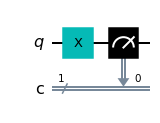

In [10]:
# Basic quantum circuit
circ = QuantumCircuit(1,1)
circ.x(0)
circ.measure(0,0)
circ.draw()

In [11]:
# Create a backend for local execution in a simulator
sim_backend = AerSimulator()

In [12]:
# Run basic circuit and measure
job = sim_backend.run(circ, shots=2048)
result = job.result()
counts = result.get_counts()

counts

{'1': 2048}

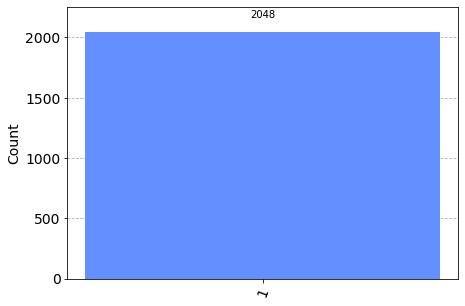

In [13]:
# Plot histogram of results
plot_histogram(counts)

# CNOT circuit

Goal: flip the state of a target qubit based on the state of another control qubit

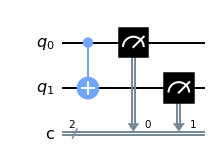

In [14]:
# Create CNOT circuit
cnot_circ = QuantumCircuit(2,2)

# Comment out the next line to see what happens when the input is left as |0>
#cnot_circ.x(0)

# Comment out the next line to see what happens when the target is left as |0>
#cnot_circ.x(1)

# Apply CNOT, then measure
cnot_circ.cx(0,1)
cnot_circ.measure([0,1],[0,1])

cnot_circ.draw()

In [15]:
# Run CNOT circuit
job = sim_backend.run(cnot_circ)
counts = job.result().get_counts()
counts

{'00': 1024}

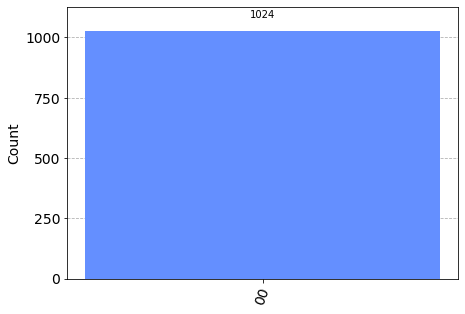

In [16]:
# Plot histogram of results
plot_histogram(counts)

# Superposition

Goal: place a qubit into an even superposition of $|0\rangle$ and $|1\rangle$

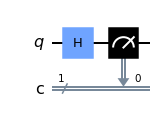

In [17]:
# Create superposition circuit by using the Hadamard gate
sp_circ = QuantumCircuit(1,1)
sp_circ.h(0)
sp_circ.measure(0,0)
sp_circ.draw()

In [18]:
# Run simulation and plot results
job = sim_backend.run(sp_circ)
sp_counts = job.result().get_counts()
sp_counts

{'1': 513, '0': 511}

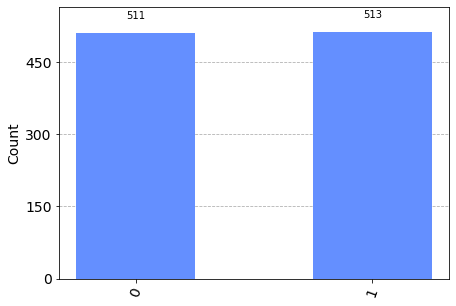

In [19]:
# Plot
plot_histogram(sp_counts)

### Multiple qubits in superposition

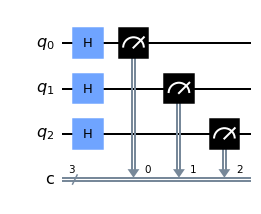

In [20]:
# Create superposition circuit
sp_circ2 = QuantumCircuit(3,3)
sp_circ2.h([0,1,2])
sp_circ2.measure([0,1,2],[0,1,2])
sp_circ2.draw()

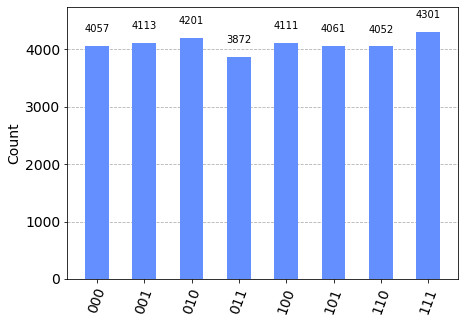

In [21]:
# Run simulation and plot results
# Try increasing the number of shots to see how that affects the result
job = sim_backend.run(sp_circ2, shots=4*8192)
sp_counts = job.result().get_counts()
plot_histogram(sp_counts)

# Bell state (entanglement)

Goal: Create the $\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$ entangled state

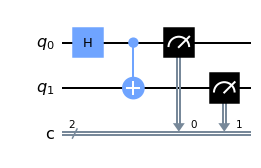

In [22]:
# Create Bell state circuit
bell_circ = QuantumCircuit(2,2)
bell_circ.h(0)
bell_circ.cx(0, 1)
bell_circ.measure([0,1], [0,1])
bell_circ.draw()

In [23]:
job = sim_backend.run(bell_circ)
bell_counts = job.result().get_counts()
bell_counts

{'11': 511, '00': 513}

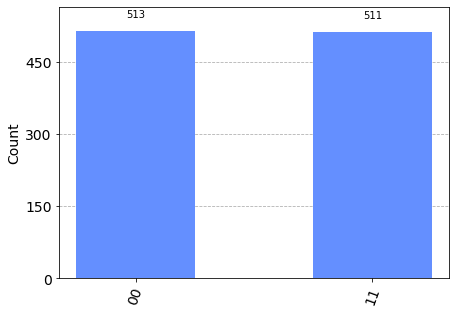

In [24]:
plot_histogram(bell_counts)

# Running on a real quantum computer

In [25]:
# Import the IBMProvider to run directly on the IBM quantum processors and cloud simulators

from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance='ibm-q/open/main')

In [26]:
# Get backend
provider.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>]

In [27]:
# Find the least busy system that has at least 2 qubits...
from qiskit_ibm_provider import least_busy

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))

print(ibmq_backend)

<IBMBackend('ibm_nairobi')>


In [28]:
# ...Or simply select a specific backend
ibmq_backend = provider.get_backend('ibm_nairobi')
ibmq_backend

<IBMBackend('ibm_nairobi')>

In [29]:
# Run the circuit
job_ibmq = ibmq_backend.run(bell_circ, shots=1024)

In [30]:
# Get the results (NOTE: this will error out since we did not transpile first!)
result = job_ibmq.result()

IBMJobFailureError: 'Job failed: Error code 7001; Instruction h is not supported'

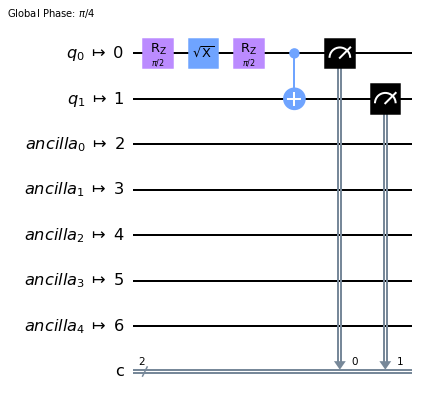

In [31]:
# Transpile the circuit first, the attempt to run again!
from qiskit import transpile

bell_circ_tp = transpile(bell_circ, ibmq_backend)
bell_circ_tp.draw()

In [32]:
# Run the circuit
job_ibmq = ibmq_backend.run(bell_circ_tp, shots=1024)

# OR...

In [33]:
# ... Just use the execute() method instead!
# The execute() method will transpile the circuit for you
from qiskit import execute

job_ibmq = execute(bell_circ, ibmq_backend, shots=1024)

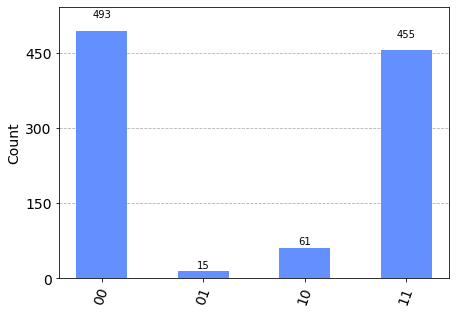

In [34]:
# Plot histogram of results. Note the noise in the system
# results in states that should not appear in the measurements.
result = job_ibmq.result()
counts = result.get_counts()
plot_histogram(counts)

## Challenge: Create other Bell states
Create the following state

### $\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

In [ ]:
# FILL IN ANSWER HERE


# Statevector simulator

It is possible to get information on the full state of the system of qubits using the statevector simulator. With this, we can see the action of gates such as the Z and phase gates directly, and view plots of the statevector (e.g. Bloch sphere). However, this is only possible in simulation.

The first example is the uniform superposition state of a single qubit that can be created using a Hadamard gate.

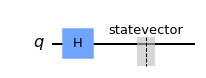

In [35]:
# Create superposition circuit again
sp_circ3 = QuantumCircuit(1)
sp_circ3.h(0)
sp_circ3.save_statevector()
sp_circ3.draw()

In [36]:
# Get the statevector simulator backend
svsim_backend = AerSimulator(method="statevector")

In [37]:
# Run in statevector simulator and get the state vector
job = svsim_backend.run(sp_circ3)
result = job.result()
state = result.get_statevector(sp_circ3)
state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


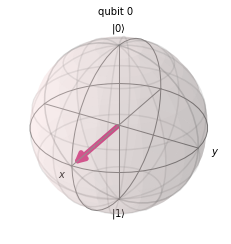

In [38]:
# Plot Bloch Sphere
plot_bloch_multivector(state)

### Z gate

The Z gate performs phase flip of a qubit that is in the $|1\rangle$ state. In the circuit below, a single qubit is placed in the uniform superposition state, and the phase of the $|1\rangle$ component of the superposition is changed from positive to negative.

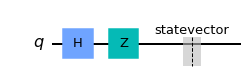

In [39]:
# Place a qubit into a superposition state
# then apply the Z gate
z_circ = QuantumCircuit(1)
z_circ.h(0)
z_circ.z(0)
z_circ.save_statevector()
z_circ.draw()

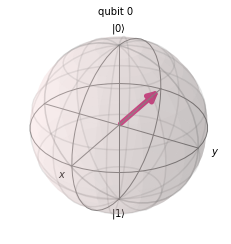

In [40]:
# Run in the statevector simulator and plot out the Bloch sphere
# representation of the state. 
job = svsim_backend.run(z_circ)
result = job.result()
state = result.get_statevector(z_circ)
plot_bloch_multivector(state)

The state has been changed to be $\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$

### Rz gate

The Rz gate rotates the state of the qubit around the Z-axis of the Bloch sphere by a given angle.

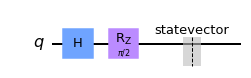

In [41]:
rz_circ = QuantumCircuit(1)
rz_circ.h(0)
rz_circ.rz(np.pi/2, 0)
rz_circ.save_statevector()
rz_circ.draw()

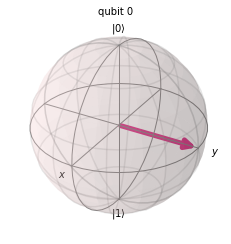

In [42]:
# Run the Rz circuit in the simulator.
job = svsim_backend.run(rz_circ)
result = job.result()
state = result.get_statevector(rz_circ)
plot_bloch_multivector(state)

### Visualizing multi-qubit states

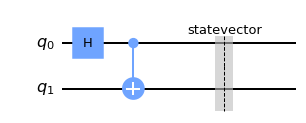

In [43]:
# Create Bell state circuit
bell_circ2 = QuantumCircuit(2)
bell_circ2.h(0)
bell_circ2.cx(0, 1)
bell_circ2.save_statevector()
bell_circ2.draw()

In [44]:
# Run in statevector simulator and get the state
job = svsim_backend.run(bell_circ2)
result = job.result()
state = result.get_statevector(bell_circ2)
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


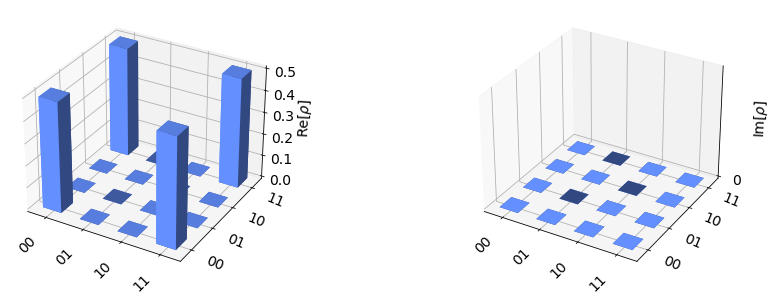

In [45]:
# Plot the statevector "city" plot
plot_state_city(state)

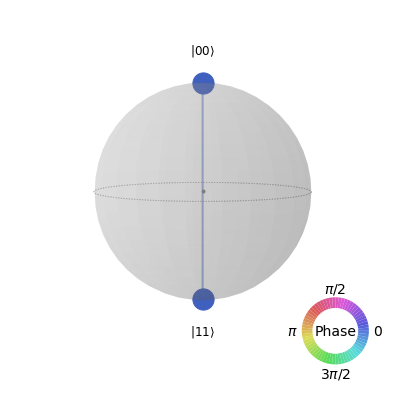

In [46]:
# Plot the state on the Qsphere
plot_state_qsphere(state)

## GHZ Circuit

A GHZ state is a maximal entangled state of multiple qubits (i.e. an extension of the Bell states to more than 2 qubits).

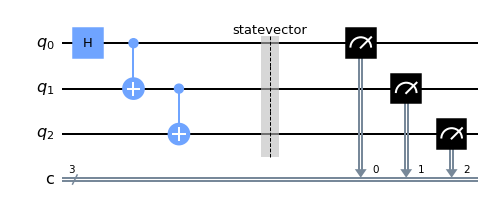

In [47]:
# Create 3-qubit GHZ state circuit
ghz_circ = QuantumCircuit(3, 3)
ghz_circ.h(0)
ghz_circ.cx(0, 1)
ghz_circ.cx(1, 2)
ghz_circ.save_statevector()
ghz_circ.measure([0,1,2], [0,1,2])
ghz_circ.draw()

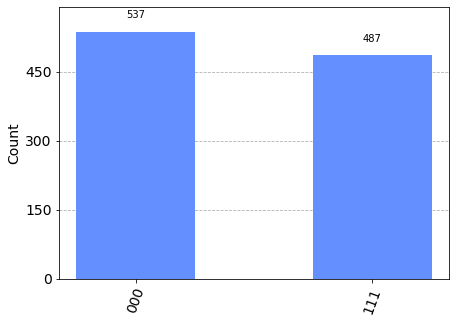

In [48]:
# Run in simulator and plot out the measured result
job = sim_backend.run(ghz_circ)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

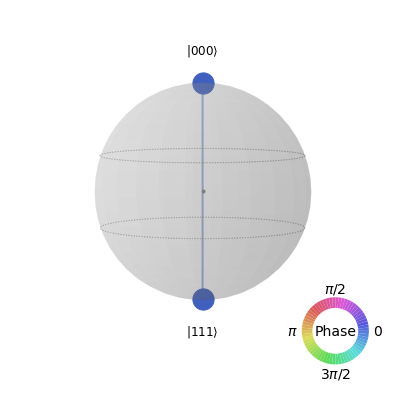

In [49]:
# Plot the QSphere
state = result.get_statevector(ghz_circ)
plot_state_qsphere(state)

### Larger GHZ circuit

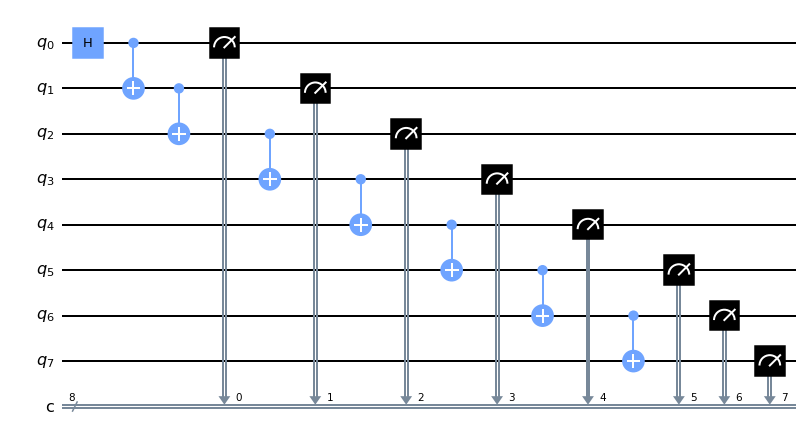

In [50]:
n_qubits = 8

big_ghz = QuantumCircuit(n_qubits, n_qubits)
big_ghz.h(0)
for i in range(n_qubits-1):
    big_ghz.cx(i, i+1)
big_ghz.measure(range(n_qubits), range(n_qubits))
big_ghz.draw()

In [51]:
# Circuit depth
big_ghz.depth()

9

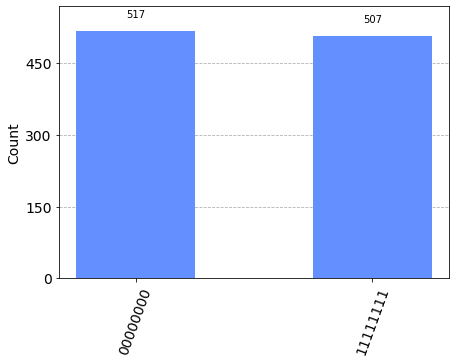

In [52]:
# Run in simulator and plot out the measured result
job = sim_backend.run(big_ghz)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Challenge: make a shorter depth GHZ circuit

The circuit above is simple, but the overall depth of the circuit is long. This happened because the sequence of CNOT gates is serialized. The system can only execute CNOT gates on a particular qubit one at a time. Long circuit depth can be problematic as a longer circuit is more susceptible to noise and decoherence in current hardware. It would be beneficial to create the same state, but with less overall depth.

Can you find a way to reduce the depth of the GHZ circuit?

Hint: find ways to overlap the execution of gates on different pairs of qubits.

In [ ]:
### INSERT ANSWER HERE ###


